# Lecture 13: Introduction to PANDAS 
***

MySQL is great for pulling data out of the database, but for interesting analysis on the data, we need to switch to another tool. We're going to use the data analysis package in Python, called Pandas.

We'll do some basic statistics on our baseball data and then a histogram and box and whisker plot. 

Start by loading Numpy and Pandas using their common aliases, np and pd. 

In [2]:
import numpy as np 
import pandas as pd

We're going to use Matplotlib's Pylab library, so let's load that. Doing it this way, we can view the plots directly in the notebook.  

In [3]:
import matplotlib.pylab as plt
%matplotlib inline

Our first exercise will use the late innings wins data from our in-class query exercise. This data shows the winning percentage for all teams when they are leading by exactly one run at the end of the 6th inning. 

We can load the data into a Pandas DataFrame using read_csv( ). You may need to change the file_path variable to point to the correct location. 

In [4]:
local_path = 'lateInningsWins.csv'

# Select the path that works for you 
file_path = local_path 

# Load the data into a DataFrame 
dfW= pd.read_csv(file_path)

# Inspect some of the data
dfW

,battingTeam,winPercentage,z-score
0,HOU,0.5500,-2.291193
1,TOR,0.5714,-1.991276
2,FLO,0.6000,-1.590453
3,BAL,0.6133,-1.404056
4,KCA,0.6494,-0.898122
5,PHI,0.6579,-0.778997
6,BOS,0.6628,-0.710324
7,CHN,0.6667,-0.655666
8,NYN,0.6667,-0.655666
9,SEA,0.6747,-0.543548


The data has columns for: 

- **battingTeam**: The name of the team 
- **winPercentage**: The winning percentage when leading by exactly 1 after 6 innings. 
- **zScore**: zScore of the winPercentage 

### Histograms of winning percentage 

Visual representations can help us understand data much better than seeing a column of data. We can plot a histogram in Python using the Pandas built-in histogram function. The Pandas' hist( ) function calls the Matplotlib hist( ) function internally, so if you're familiar with Matplotlib, it should be any easy transition to use the Pandas function. 

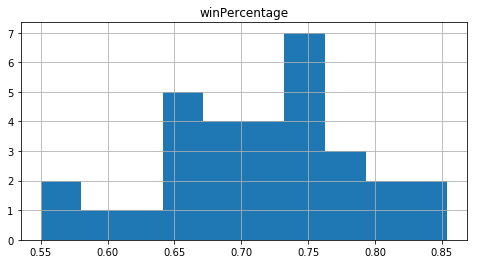

In [5]:
# Initialize figure and axis
fig, ax = plt.subplots(figsize=(8,4))

# Plot histogram 
dfW.hist(column="winPercentage", ax=ax);

We made a basic histogram of the **winPercentage** data using Pandas' hist( ) function.  We call the hist( ) function on the entire DataFrame and then indicate which column we want to use using the $\texttt{column}$ option.  Finally, we pass in the figure axis to the function so that we can make modifications to the layout later on. 

Using the basic histogram, Pandas does thebin selection automatically. We can also define our own bins by passing in an optional $\texttt{bins}$ argument to hist( ).  The two options are to pass in an integer value for the number of bins you want _or_ a list specifying the bin edges. Suppose for example we want bins of width 0.025 starting at 0.55 and ending at 0.90.  We could do the following:  

In [6]:
my_bins = np.linspace(0.55,0.90,18)
print("bin edges = ", list(my_bins))

bin edges =  [0.55000000000000004, 0.57058823529411773, 0.5911764705882353, 0.61176470588235299, 0.63235294117647067, 0.65294117647058825, 0.67352941176470593, 0.69411764705882351, 0.71470588235294119, 0.73529411764705888, 0.75588235294117645, 0.77647058823529413, 0.79705882352941182, 0.81764705882352939, 0.83823529411764708, 0.85882352941176476, 0.87941176470588234, 0.90000000000000002]


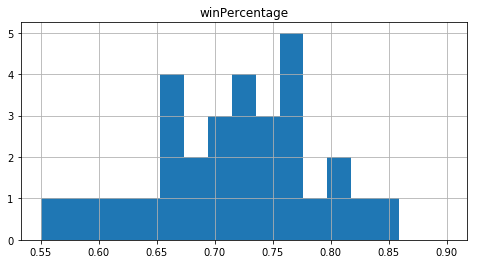

In [7]:
# Initialize figure 
fig, ax = plt.subplots(figsize=(8,4))

# Plot histogram 
dfW.hist(column="winPercentage", ax=ax, bins=my_bins);

We can also mess with other properties in the figure, such as a title, labels, and other colors to make it look more appealing.  

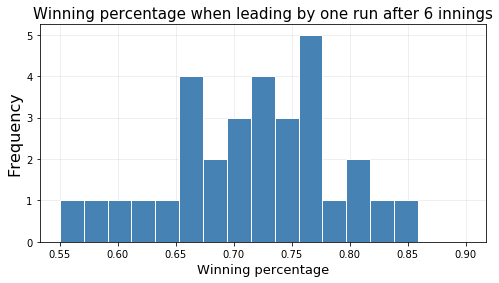

In [8]:
# Initialize figure 
fig, ax = plt.subplots(figsize=(8,4))

# Plot histogram with custom colors
dfW.hist(column="winPercentage", ax=ax, bins=my_bins, facecolor="steelblue", edgecolor="white")

# Add a title
ax.set_title("Winning percentage when leading by one run after 6 innings", fontsize=15)

# Add axis labels 
ax.set_xlabel("Winning percentage", fontsize=13)
ax.set_ylabel("Frequency", fontsize=16)

# Make the grid lines lighter and put them behind data 
ax.grid(alpha=0.25)
ax.set_axisbelow(True)


### Exercise 1
***
Load the maxSalaries.csv file and make a histogram of the salary column. Include all teams and positions in your histogram. 


In [10]:
local_path = 'maxSalaries.csv'

# Select the path that works for you 
file_path = local_path 

# Load the data into a DataFrame 
dfMS= pd.read_csv(file_path)

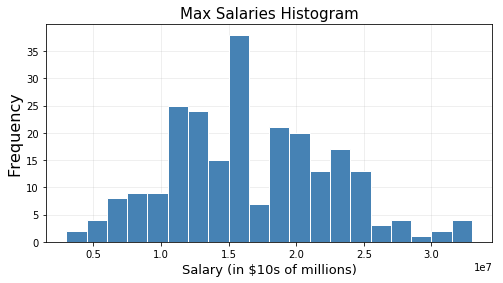

In [23]:
# Initialize figure 
fig, ax = plt.subplots(figsize=(8,4))

# Plot histogram with custom colors
dfMS['salary'].hist(ax=ax, bins=20,facecolor="steelblue", edgecolor="white")

# Add a title
ax.set_title("Max Salaries Histogram", fontsize=15)

# Add axis labels 
ax.set_xlabel("Salary (in $10s of millions)", fontsize=13)
ax.set_ylabel("Frequency", fontsize=16)

# Make the grid lines lighter and put them behind data 
ax.grid(alpha=0.25)
ax.set_axisbelow(True)

We can filter the data by a particular column and save that data as a new data frame. 

In [11]:
pitchers = dfMS.loc[dfMS["POS"] == "P"].copy()
pitchers.head()

,teamID,playerID,salary,yearID,POS
3,ARI,bellhe01,10000000,2013,P
4,ARI,greinza01,31799030,2016,P
14,ATL,lowede01,15000000,2010,P
16,ATL,lowede01,15000000,2011,P
17,ATL,cahiltr01,12000000,2015,P


Side-by-side or stacked histograms are a great way to compare two sets of data.  We can use our salary data to compare the salaries of pitchers with other players. We'll create histograms of **salary** data from our pitchers data frame and put all salary data in the other histogram. In order to make a true comparison, we need to set the range on the horizontal and vertical axes to be the same on both plots. 

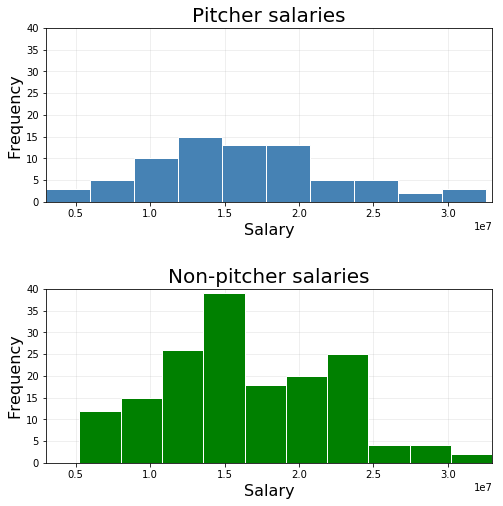

In [18]:
# Initialize figure subplots
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(8,8))

# --------------------------------------
# Plot histogram for pitchers on top 
# --------------------------------------
pitchers.hist(column="salary", ax=axes[0], facecolor="steelblue", edgecolor="white")
                                                      
# Add titles and labels 
axes[0].set_title("Pitcher salaries", fontsize=20)
axes[0].set_xlabel("Salary", fontsize=16)
axes[0].set_ylabel("Frequency", fontsize=16)

# Make grid lighter and set behind data
axes[0].grid(alpha=0.25)
axes[0].set_axisbelow(True)

# --------------------------------------
# Plot histogram for non-pitchers on bottom 
# --------------------------------------
dfMS.loc[dfMS["POS"]!="P"].hist(column="salary", ax=axes[1], facecolor="green", edgecolor="white")
                                                      
# Add titles and labels 
axes[1].set_title("Non-pitcher salaries", fontsize=20)
axes[1].set_xlabel("Salary", fontsize=16)
axes[1].set_ylabel("Frequency", fontsize=16)

# Make grid lighter and set behind data
axes[1].grid(alpha=0.25)
axes[1].set_axisbelow(True)

# --------------------------------------
# Make the plots comparable 
# --------------------------------------

# Set x and y axis limits to match
minSal = dfMS['salary'].min()
maxSal = dfMS['salary'].max()
axes[0].set_xlim([minSal, maxSal])
axes[1].set_xlim([minSal, maxSal])
axes[0].set_ylim([0,40])
axes[1].set_ylim([0,40]);

# Adjust vertical space so titles/axis labels don't overlap 
fig.subplots_adjust(hspace=.5)

Note that because we set the horizontal and vertical axis ranges to be the same we can easily make visual comparisons between the data.  For instance it is crystal clear that that it tends to be hotter in general in Sugarloaf than in Niwot. 

### Exercise 2
***
Make stacked histograms to compare the maximum salaries in 2015 and 2016. You can try different parameters until you find a style and color scheme that you like.  Add meaningful titles and axis labels! 


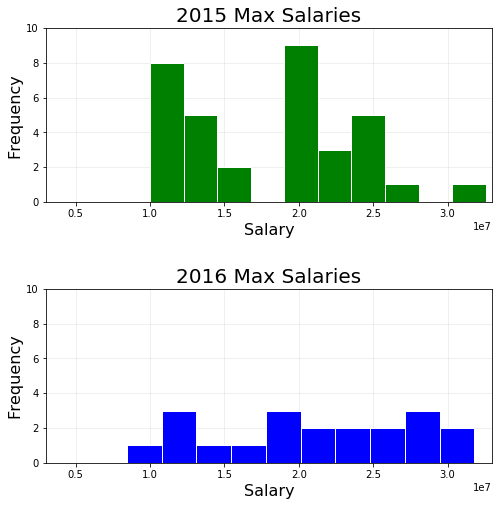

In [25]:
# Initialize figure subplots
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(8,8))

# --------------------------------------
# Plot histogram for 2015
# --------------------------------------
dfMS.loc[dfMS["yearID"]==2015].hist(column="salary", ax=axes[0], facecolor="green", edgecolor="white")
                                                      
# Add titles and labels 
axes[0].set_title("2015 Max Salaries", fontsize=20)
axes[0].set_xlabel("Salary", fontsize=16)
axes[0].set_ylabel("Frequency", fontsize=16)

# Make grid lighter and set behind data
axes[0].grid(alpha=0.25)
axes[0].set_axisbelow(True)

# --------------------------------------
# Plot histogram for 2016
# --------------------------------------
dfMS.loc[dfMS["yearID"]==2016].hist(column="salary", ax=axes[1], facecolor="blue", edgecolor="white")
                                                      
# Add titles and labels 
axes[1].set_title("2016 Max Salaries", fontsize=20)
axes[1].set_xlabel("Salary", fontsize=16)
axes[1].set_ylabel("Frequency", fontsize=16)

# Make grid lighter and set behind data
axes[1].grid(alpha=0.25)
axes[1].set_axisbelow(True)

# --------------------------------------
# Make the plots comparable 
# --------------------------------------

# Set x and y axis limits to match
minSal = dfMS['salary'].min()
maxSal = dfMS['salary'].max()
axes[0].set_xlim([minSal, maxSal])
axes[1].set_xlim([minSal, maxSal])
axes[0].set_ylim([0,10])
axes[1].set_ylim([0,10]);

# Adjust vertical space so titles/axis labels don't overlap 
fig.subplots_adjust(hspace=.5)

After you've gotten some decent _Frequency_ histograms, pass the parameter **normed=True** into the hist( ) function and redo the plots.  Note that you'll probably have to change the vertical axis limits.  How does the **normed=True** parameter change the histograms? 

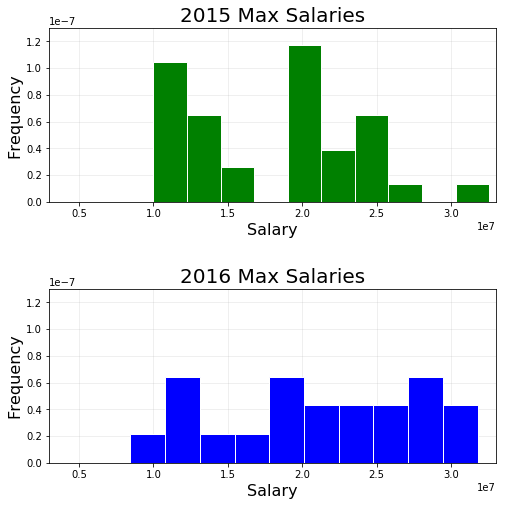

In [30]:
# Initialize figure subplots
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(8,8))

# --------------------------------------
# Plot histogram for 2015
# --------------------------------------
dfMS.loc[dfMS["yearID"]==2015].hist(column="salary", ax=axes[0], facecolor="green", edgecolor="white", normed=True)
                                                      
# Add titles and labels 
axes[0].set_title("2015 Max Salaries", fontsize=20)
axes[0].set_xlabel("Salary", fontsize=16)
axes[0].set_ylabel("Frequency", fontsize=16)

# Make grid lighter and set behind data
axes[0].grid(alpha=0.25)
axes[0].set_axisbelow(True)

# --------------------------------------
# Plot histogram for 2016
# --------------------------------------
dfMS.loc[dfMS["yearID"]==2016].hist(column="salary", ax=axes[1], facecolor="blue", edgecolor="white", normed=True)
                                                      
# Add titles and labels 
axes[1].set_title("2016 Max Salaries", fontsize=20)
axes[1].set_xlabel("Salary", fontsize=16)
axes[1].set_ylabel("Frequency", fontsize=16)

# Make grid lighter and set behind data
axes[1].grid(alpha=0.25)
axes[1].set_axisbelow(True)

# --------------------------------------
# Make the plots comparable 
# --------------------------------------

# Set x and y axis limits to match
minSal = dfMS['salary'].min()
maxSal = dfMS['salary'].max()
axes[0].set_xlim([minSal, maxSal])
axes[1].set_xlim([minSal, maxSal])
axes[0].set_ylim([0,.00000013])
axes[1].set_ylim([0,.00000013]);

# Adjust vertical space so titles/axis labels don't overlap 
fig.subplots_adjust(hspace=.5)

### Summary statistics 
***

Pandas provides built-in functions to calculate the summary statistics that we will use in this class. We can calculate the mean, standard deviation and IQR, for example. To calculate the mean of the salary data, we do:  

In [31]:
dfMS['salary'].mean()

16438873.016736401

We can also call mean on the entire data frame and get the mean of all **numerical** data. Pandas is seeing yearID as a numerical field and taking the mean, which isn't really useful.

In [32]:
dfMS.mean()

salary    1.643887e+07
yearID    2.012824e+03
dtype: float64

We can also call mean on the entire data frame and get the mean of all **numerical** data. Pandas is seeing yearID as a numerical field and taking the mean, which isn't really useful.

In this case, Pandas returned a Series with the means of all of the **numerical** data in the DataFrame. 

The functions for the other summary statistics are as follows: 

\begin{array}{l|l}
\textrm{Function} & \textrm{Statistics} \\
\hline
\textrm{.var()} & \textrm{variance} \\
\textrm{.std()} & \textrm{standard deviation} \\
\textrm{.min()} & \textrm{minimum value} \\
\textrm{.max()} & \textrm{maximum value} \\
\textrm{.median()} & \textrm{value} \\
\textrm{.quantile(q)} & \textrm{quantile, where q is the desired percentage as a decimal} \\
\end{array}

### Exercise 3
***
Use these functions to compute the 5-number summary for the salary data.

In [ ]:
minval = dfMS['salary'].min()
maxval = # TODO 
Q1 = # TODO 
Q2 = # TODO 
Q3 = # TODO 
print("5-Number Summary: {:.2f}    {:.2f}    {:.2f}    {:.2f}    {:.2f}".format(minval, Q1, Q2, Q3, maxval))

### Box-and-Whisker Plots 
***

Next we'll look at Pandas' box-and-whisker plot functionality using the boxplot( ) function.  We'll start by making a box-and-whisker plot for the salary data. Like the hist( ) function, boxplot( ) is called on the entire DataFrame, and then we specify which column we're interested in using the **column** parameter.  

In [ ]:
# Initialize figure 
fig = plt.figure(figsize=(6,6))

# Gat axis object 
ax = fig.add_subplot(111)

# Plot histogram 
dfMS.boxplot(column="salary", ax=ax);

Note that the result is a standard box-and-whiskers plot with a box, where
* The top of the box is Q3 - the upper quartile
* The bottom of the box is Q1 - the lower quartile
* The median line is in the middle of the box
* Whisker lines are furthest points that are not outliers
* Outliers that fall more than $1.5 \times IQR$ outside of the nearest quartile. 

Unfortunately, the default parameters don't lend themselves well to easy-to-read plots, so we'll make a few tweaks. 

In [ ]:
# Initialize figure 
fig, ax = plt.subplots(figsize=(6,6))


# Plot histogram, but this time return dictionary of style parameters for modification after the fact 
bp = dfMS.boxplot(column="salary", ax=ax, widths=[.25], return_type='dict');

# ---------------------------------------
# Set properties of various parts of plot 
# ---------------------------------------

# Change properties of boxes 
for box in bp['boxes']:
    box.set(color='steelblue', linewidth=2)
    
# Change properties of whiskers 
for whisker in bp['whiskers']:
    whisker.set(color='gray', linewidth=2)
    
# Change properties of caps 
for cap in bp['caps']:
    cap.set(color='gray', linewidth=2)
    
# Change properties of median 
for cap in bp['medians']:
    cap.set(color='green', linewidth=2, alpha=0.5)
    
# Change properties of fliers (outliers) 
for flier in bp['fliers']:
    flier.set(markerfacecolor='steelblue', linewidth=2, marker='s', markersize=6, alpha=0.5)

# Set title and vertical axis label
ax.set_title('Max salaries per team 2010-2016', fontsize=18)
ax.set_ylabel("$", fontsize=16)

# Make grid-lines lighter
ax.grid(alpha=0.25)

Notice that the default settings for boxplot( ) gives us whiskers and outliers as described in lecture.  That is, the length of the whiskers are set equal to the largest distance between an observation and the upper or lower quartile that is less than $1.5 \times IQR$.  Any data point beyond this distance is drawn as an outlier (or a _flier_ as Pandas calls them).   

Box-and-whisker plots are great for visualizing the spread of the data, outliers, and skew of the data.  For instance, from this box-and-whisker plot we can tell that the data is symetric because the median is evenly between the upper quartile $Q_3$ and the lower quartile $Q_1$. The data also includes outliers in the higher salary range. 

Box-and-whisker plots are especially useful for comparing multiple sets of observations.  For instance, we can use side-by-side box-and-whisker plots to compare the salaries at different positions. We already created a data frame from the pitchers data. We could compare pitchers to outfielders, for example.

Note that the trick here is to select the rows of the DataFrame corresponding only to POS = P or POS = OF and then call boxplot( ) with the **by** parameter to break the data into the two sets based on the value of the **POS** column.  

C:\Anaconda\lib\site-packages\numpy\core\fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


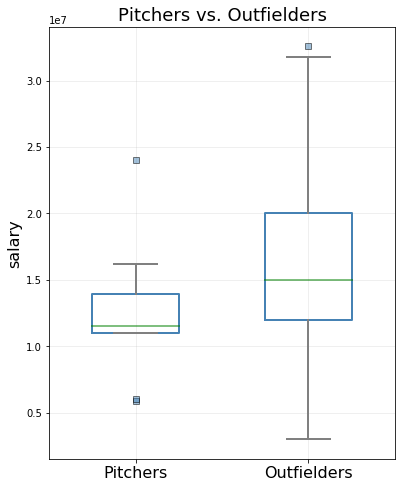

In [35]:
# Initialize figure 
fig, ax = plt.subplots(figsize=(6,8))

# To get just the columns corresponding to P and OF, we 
# select only the rows of the DataFrame coresponding to those names, then 
# call boxplot and pass by="POS" to break the data into the two sets 
bp = dfMS.loc[(dfMS["POS"]=='P') | (dfMS["POS"]=='2B')].boxplot(
    column=["salary"], by="POS", ax=ax, widths=[.5, .5], return_type="dict")

# This time, bp is a Pandas series containing multiple dictionaries
# corresponding to the two sets of data. We loop over each one individually 
# and set the parameters we want 
for column in bp:
    
    # Change properties in boxes 
    for box in column['boxes']:
        box.set(color='steelblue', linewidth=2)
    
    # Change properties of whiskers 
    for whisker in column['whiskers']:
        whisker.set(color='gray', linewidth=2)

    # Change properties of caps 
    for cap in column['caps']:
        cap.set(color='gray', linewidth=2)

    # Change properties of median 
    for cap in column['medians']:
        cap.set(color='green', linewidth=2, alpha=0.5)

    # Change properties of fliers (outliers) 
    for cap in column['fliers']:
        cap.set(markerfacecolor='steelblue', linewidth=2, marker='s', markersize=6, alpha=0.5)

# Set title and vertical axis label
ax.set_title('Pitchers vs. Outfielders', fontsize=18)
ax.set_ylabel("salary", fontsize=16)

# Set names of plots
plt.xticks([1,2],["Pitchers", "Outfielders"], rotation=0, fontsize=16)

# Get rid of automatically generated titles and xlables
plt.suptitle("")
ax.set_xlabel("")

# Make grid-lines lighter
ax.grid(alpha=0.25);

From the side-by-side box-and-whiskers plots we can easily see several things 

- Outfielders have a larger salary range than pitchers
- Outfielders are positively skewed, while pitchers are symetric 
- There is more variability in the middle 50% of the Outfielders data than in the middle 50% of the pitchers data

### Exercise 4
***

Plot side-by-side box and whisker plots of the salary data for **all** positions individually. You might need to modify the plot parameters until you get a graphic that doesn't look too cramped.  Note that it might be helpful to make the figure much wider and rotate the horizontal labels 90 degrees. 

### Exercise 5
***

Produce a box and whisker plot of the winning pecentage data. Comment on how the box and whisker plot compares to the histogram for the same data. 